# TUTORIAL: the Rijke tube model (Galerkin method) 
### Low order model of longitudinal thermocaoustic instabilities

| <video src="../../docs/figs/TA_longitudinal/media2.mp4" height="400" controls></video> |  <video src="../../docs/figs/TA_longitudinal/input.mp4" height="400" controls></video> |
|:---:|:---:|
| Thermoacoustics Rijke (with sound). https://youtu.be/HCguUpaAvX4. | Flame time delay. Courtesy of Garita, Juniper,  Sengupta.|

## 1. The Rijke tube low order model


The acoustics in a Rijke model are governed by the dimensionless linearised  momentum and energy conservation equations. 
We formulate the time-delayed problem in the Markovian framework proposed by Huhn & Magri (2019). 
The discretized system of equations governing the acoustics is 
\begin{align}
    &\dfrac{\partial u}{\partial t} + \dfrac{1}{\bar{\rho}}\dfrac{\partial p}{\partial x} = 0 \\
    &\dfrac{\partial p}{\partial t} + \bar{\rho}\,\bar{c}^2\dfrac{\partial u}{\partial x} = \dot{q}(\gamma -1)\delta(x - x_\mathrm{h})  -\zeta \dfrac{\bar{c}}{L_x}p\\
    &\dfrac{\partial w}{\partial t} - \dfrac{1}{\tau_\nu}\dfrac{\partial w}{\partial X} = 0 %\quad,\qquad0\leq X\leq1
\end{align}
where $x_\mathrm{h}$ is the heat source location;  $\bar{\rho}, \bar{c}$ and $\bar{u}$ are the mean-flow density, speed of sound and velocity, respectively; $\gamma$ is the heat capacity ratio; $\zeta$ is the damping factor; ${\delta}$ is the Dirac delta distribution, which enforces a compact assumption for the heat release rate $\dot{q}$ [W/m$^2$],  which we model with the simple time-delayed square-root law
\begin{equation}
    \dot{q}(t)= \bar{u}\bar{p}\beta\left(\sqrt{\left|{\dfrac{1}{3}+\dfrac{u\left(x_\mathrm{h}, t-\tau\right)}{\bar{u}}}\right|}-\sqrt{\dfrac{{1}}{3}}\right), 
\end{equation}
The open-ended boundary conditions are ideal, which means that the acoustic pressure is zero, i.e., $p'=0$ at $x=\{0,1\}$.  The advection equation transforms the time-delayed problem into an initial value problem. The equation is used to keep track of the acoustic velocity history at the heat source location, i.e. it acts as a numerical memory. 
The dummy variable $w$, which  travels in a dimensionless spatial domain $X$ with velocity $-\tau_\nu$, models the history of the acoustic velocity at the heat source location, $x_\mathrm{h}$. We define the boundary condition
\begin{equation}
    w\left(X = 0,\,t\right) = u\left(x=x_\mathrm{h}, t\right),
\end{equation}
such that the acoustic velocity at the heat source location at some time $t-\Delta$ is given by
\begin{equation}
    u\left(x_\mathrm{h},t-\Delta\right)= w\left(0,\,t-\Delta \right)=w\left(\Delta/\tau_\nu,\,t\right). 
\end{equation}
The velocity of the advection is  $\tau_\nu^{-1}$ such that $\tau_\nu\geq\tau$, because the length of the stored history must be at least equal to the acoustic time delay. (Note that if $\tau$ is constant, one can set $\tau_\nu=\tau$, such that $u\left(x_\mathrm{h}, t-\tau\right)=w\left(1,t\right)$.)

The acoustic equations are discretized in space with a Galerkin method by taking the natural acoustic modes as the orthogonal spatial basis. The ideal boundary conditions ($p(x=0) = p(x = L_x) =0$) are enforced by choosing for the velocity and pressure oscillations the basis
\begin{align}
    u(x,t)&=\sum^{N_m}_{j=1}\,\eta_j(t)\,\cos{\left(\dfrac{\omega_j}{\bar{c}} x\right)}\quad \mathrm{and} \quad
    p(x,t)=-\sum^{N_m}_{j=1}\,\mu_j(t)\sin{\left(\dfrac{\omega_j}{\bar{c}} x\right)},
\end{align}
where $N_m$ is the number of the acoustic modes. Finally, we discretize the advection equation in $X$ with a Chebyshev spectral method, using the  Chebyshev polynomial matrix $\mathbf{D}$ for $N_c+1$ collocation points, which are defined as $X_i=0.5\left(1-\cos{\left({i\pi/N_c}\right)}\right)$ for $i=0,\dots,N_c$. Introducing the Galerkin and Chebyshev discretizations yields the governing equations
\begin{align}
    &\dfrac{\mathrm{d}\eta_j}{\mathrm{d} t} = \dfrac{\omega_j}{\bar{\rho}\bar{c}}\mu_j \\
    &\dfrac{\mathrm{d} \mu_j}{\mathrm{d} t} = - \bar{\rho}\,\bar{c}\,\omega_j\eta_j -2\,\dot{q}\dfrac{\Gamma-1}{L_x}\sin{\left(\dfrac{\omega_j}{\bar{c}}x_\mathrm{h}\right)}- \zeta_j \dfrac{\bar{c}}{L_x} \mu_j, \quad  \mathrm{for} \quad j=0,\dots,N_m-1
    \\
    &\dfrac{\mathrm{d}\nu_i}{\mathrm{d}t} = 2\tau_\nu \sum_k{D}_{ik} \nu_k \quad  \mathrm{for} \quad i=0,\dots,N_c-1
\end{align}
where $\eta_j$ and $\mu_j$ are the acoustic velocity and pressure modes resulting from the Galerkin discretization of the acoustic velocity, $u$, and pressure, $p$, into $N_m$ acoustic modes with $\omega_j$ acoustic frequencies; $\zeta_j$ is the damping, defined with the modal form $\zeta_j=C_1 j^2 + C_2 \sqrt{j}$; and $\nu_k$ are the Chebyshev modes, with $k=1,\dots,N_c$, resulting from discretizing the advection equation carrying the delayed velocity at the flame location.



In [1]:
from src.models_physical import Rijke
case = Rijke()

state, t_ = case.time_integrate(int(case.t_transient / case.dt))
case.update_history(state, t_)


## 2. Visualize acoustic modes

The state vector is formed of
$$
\boldsymbol{\phi} = 
        \begin{bmatrix}
        \eta_1 \\ 
        \vdots \\ 
        \eta_{N_m}\\
        \mu_1\\
        \vdots\\
        \mu_{N_m}\\
        \nu_1\\
        \vdots\\
        \nu_{N_c}
        \end{bmatrix}
        \in \mathbb{R}^{2N_m+N_c}
$$

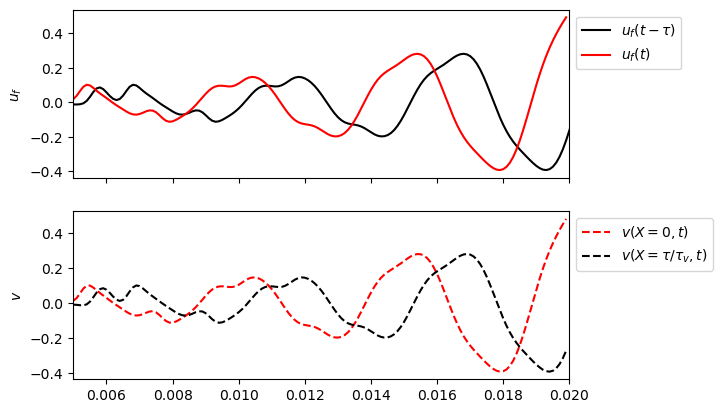

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fog, axs = plt.subplots(2, 1, sharex='col', sharey='row')
xlims = [[case.hist_t[0], case.hist_t[-1]-case.t_CR], [case.hist_t[-1]-case.t_CR, case.hist_t[-1]]]


u_f = np.dot(case.hist[:, :case.Nm,0], case.cosomjxf)

tau = int(case.tau // case.dt)

x_tau = int(case.tau/case.tau_adv)
chev_x = np.argmin(abs(case.gc-x_tau))-1

v0 = case.hist[:, 2*case.Nm]
v1 = case.hist[:, 2*case.Nm+chev_x]

t0 = 50
t1 = t0 + 150
axs[0].plot(case.hist_t[t0:t1+tau], u_f[t0-tau:t1], 'k', label='$u_f(t-\\tau)$') 
axs[0].set(ylabel='$u_f$', xlim=[case.hist_t[t0], case.hist_t[t1]])   
axs[0].plot(case.hist_t[t0:t1], u_f[t0:t1], 'r', label='$u_f(t)$')
axs[1].plot(case.hist_t[t0:t1], v0[t0:t1], 'r--',  label='$v(X=0,t)$')
axs[1].plot(case.hist_t[t0:t1], v1[t0:t1], 'k--', label='$v(X=\\tau/\\tau_v,t)$')
axs[1].set(ylabel='$v$', xlim=[case.hist_t[t0], case.hist_t[t1]])   
[ax.legend(loc='upper left', bbox_to_anchor=(1., 1.)) for ax in axs]



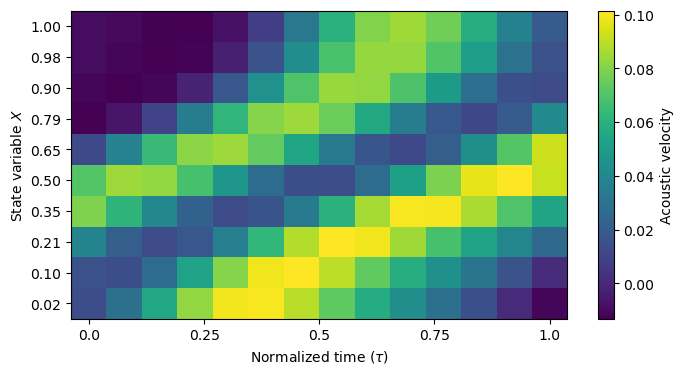

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(case.hist[t0:t0+tau, 2*case.Nm:, 0].T, aspect='auto', cmap='viridis', origin='lower')
ax.set(xticks=np.linspace(0, tau-1, 5), xticklabels =np.round(np.linspace(0, 1, 5), 2), # normalized time
       yticks=np.arange(case.Nc), yticklabels=[f"{yt:.2f}" for yt in case.gc[1:]], # Chevishev colocation points
       xlabel=r'Normalized time ($\tau$)', ylabel='State variable $X$') 
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Acoustic velocity')



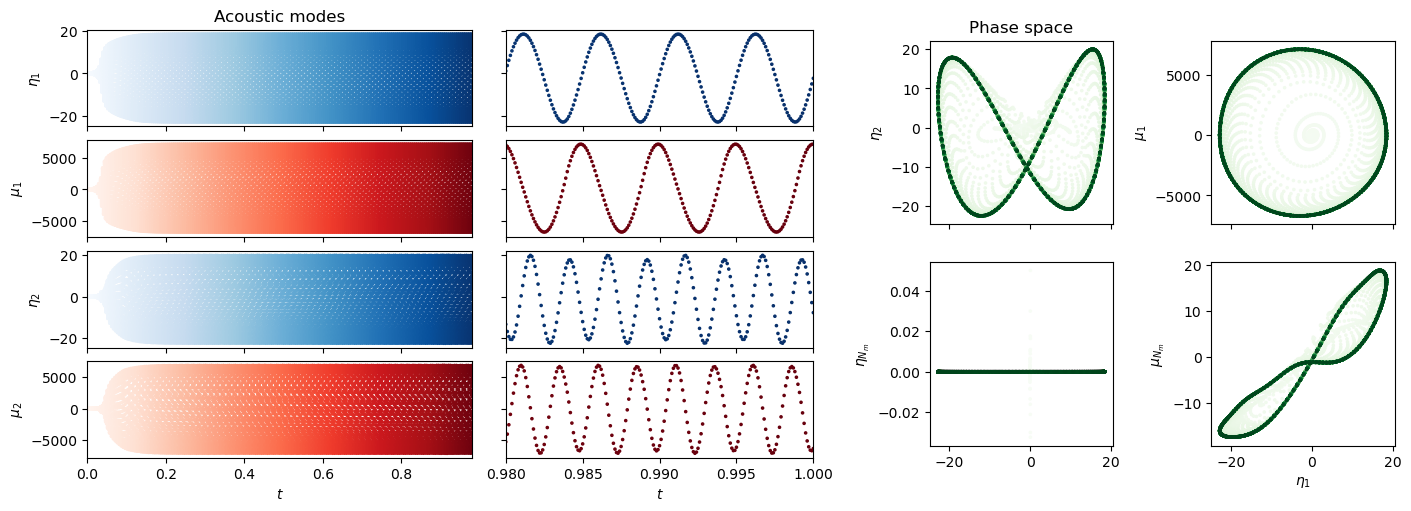

In [4]:


fig1 = plt.figure(figsize=(14, 5), layout="constrained")
sub_fig1 = fig1.subfigures(1, 2, width_ratios=[1.5, 1])
axs = sub_fig1[0].subplots(4, 2, sharex='col', sharey='row', width_ratios=[1, 0.8])
Nt_zoom = int(case.t_CR / case.dt)
xlims = [[case.hist_t[0], case.hist_t[-1]-case.t_CR], [case.hist_t[-1]-case.t_CR, case.hist_t[-1]]]

lbls = ['$\eta_1$', '$\mu_1$', '$\eta_{2}$', '$\mu_{2}$']
cmaps = ['Blues', 'Reds', 'Blues', 'Reds']

for axs_, xl, tl in zip([axs[:, 0], axs[:, 1]], xlims, ['Acoustic modes', '']):
    for ii, ax, lbl, cmap in zip([0, case.Nm, 1, case.Nm+1], axs_, lbls, cmaps):
        ax.scatter(case.hist_t, case.hist[:, ii], c=case.hist_t, cmap=cmap, s=10, marker='.')
        if xl == xlims[0]:
            ax.set(ylabel=lbl)
    axs_[-1].set(xlabel='$t$', xlim=xl)
    axs_[0].set_title(tl)
    
axs = sub_fig1[1].subplots(2, 2, sharex='all')
axs = axs.ravel()
axs[0].set_title('Phase space')
for ii, ax, ylbl in zip([1, case.Nm, case.Nm-1, case.Nm*2], axs, ['$\eta_2$', '$\mu_1$', '$\eta_{N_m}$', '$\mu_{N_m}$']):
    ax.scatter(case.hist[:, 0], case.hist[:, ii], c=case.hist_t, cmap='Greens', s=10, marker='.')
    ax.set(ylabel=ylbl)
    if ii > case.Nm:
        ax.set(xlabel='$\eta_1$')
    ax.set_aspect(1. / ax.get_data_ratio())
plt.show()

## 3. Visualize acoustic pressure along the tube

The acoustic pressure at any location $x_q$ is computed as
$$
{p}_{mic}(x_q, t) = -\sum^{N_m}_{j=1}\,\mu_j(t)\sin{\left(\dfrac{\omega_j}{\bar{c}} x_q\right)}. 
$$


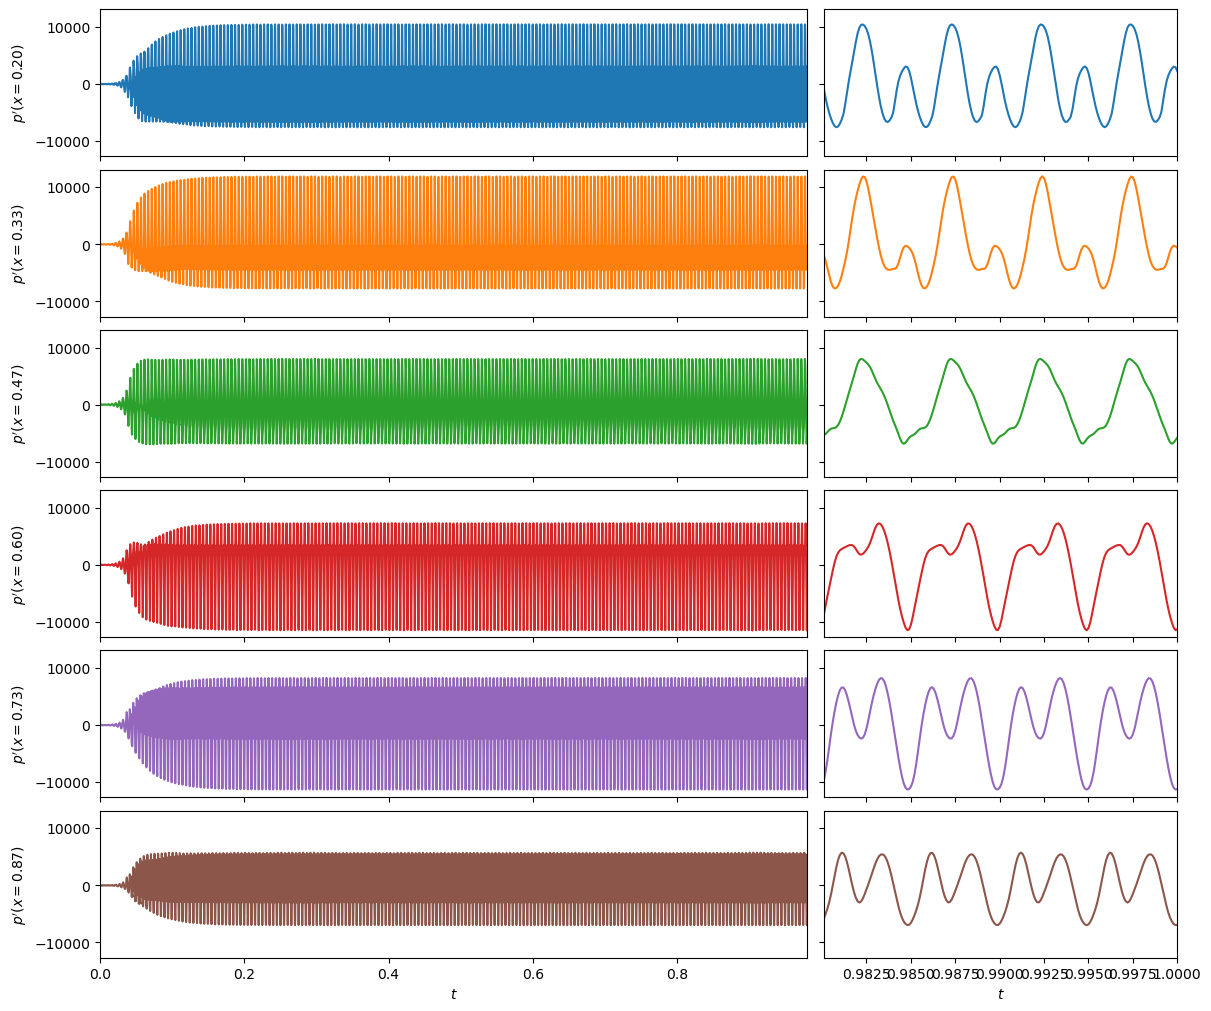

In [5]:

y = case.get_observable_hist()
lbl = case.obs_labels

fig1 = plt.figure(figsize=(12, 10), layout="constrained")
all_axs = fig1.subplots(case.Nq, 2, sharex='col', sharey=True, width_ratios=[2,1])
for axs, xl in zip([all_axs[:, 0], all_axs[:, 1]], [[0, -Nt_zoom], [-Nt_zoom, -1]]):
    for ax, ii, lbl in zip(axs, range(case.Nq), case.obs_labels):
        ax.plot(case.hist_t, y[:, ii], c='C{}'.format(ii))
        if xl[0] == 0:
            ax.set(ylabel=lbl)
    axs[-1].set(xlabel='$t$', xlim=[case.hist_t[xl[0]], case.hist_t[xl[-1]]])
    
        

We can also visualize the acoustic pressure in all the combustor as a video.

In [7]:
from matplotlib.animation import FuncAnimation
import numpy as np
import os
from src.utils import set_working_directories

folder = set_working_directories('TA_longitudinal/')[-1]
pressure_video_name = folder + 'Rijke.gif'


if not os.path.isfile(pressure_video_name):
    # Compute the meshgrid for the contour plot
    xx = np.linspace(0, case.L, 100)  
    X, Y = np.meshgrid(xx / case.L, [0, 0.25])
    # Get the data for the contour plot and mics
    start_i = int((case.hist_t[-1] - .02) // case.dt)
    y_all = case.get_observable_hist(loc=xx).squeeze()[start_i:]
    y_mic = case.get_observable_hist(loc=case.x_mic)[start_i:]
    t_gif = case.hist_t[start_i:] 
    # Create the figure and subplots
    fig1 = plt.figure(figsize=(8, 6), dpi=80, layout="constrained")
    sub_fig1 = fig1.subfigures(2, 1, height_ratios=[0.5, 1.])
    axs = sub_fig1[1].subplots(case.Nq//2, 2, sharey=True, sharex=True)
    axs = axs.ravel()
    [ax.set(ylabel=lbl) for ax, lbl in zip(axs, case.obs_labels)] 
    axs[-1].set(xlabel='$t$', xlim=[case.hist_t[0], case.hist_t[-1]])
    ax2 = sub_fig1[0].subplots(1, 1)
    ax2.set(yticklabels=[], title='Acoustic Pressure', xlabel='$x/L$')
    ax2.axvline(x=case.xf/case.L, color='k', ls='--', lw=3)
    lim, contour_levels= 10000, 50  
    Z_fake = np.ones(X.shape) * lim
    Z_fake[:, 0] *= -1
    cbar_mesh = ax2.contourf(X, Y, Z_fake, cmap='RdBu', levels=contour_levels, vmin=-lim, vmax=lim)
    cbar = plt.colorbar(cbar_mesh, ax=ax2, label='Pressure',  extend='both')
    tube_mesh = ax2.contourf(X, Y, [y_all[0].T] * 2, cmap='RdBu', levels=contour_levels, vmin=-lim, vmax=lim)
    axs[-1].set(xlim=[t_gif[0], t_gif[-1]])
    def update(frame):
        [ax.plot(t_gif[:frame+1], y_mic[:frame+1, ii], c='C{}'.format(ii), lw=2) for ax, ii in zip(axs, np.arange(case.Nq))]
        [coll.remove() for coll in list(ax2.collections)]
        ax2.contourf(X, Y, [y_all[frame].T] * 2, cmap='RdBu', levels=contour_levels, vmin=-lim, vmax=lim)
        ax2.axvline(x=case.xf/case.L, color='k', ls='--', lw=3)
        ax2.set_title('Acoustic Pressure $t$ = {:.3f} s'.format(t_gif[frame]))
    # Run and save animation
    anim = FuncAnimation(fig1, update, frames=np.arange(len(t_gif)), interval=15)
    anim.save(pressure_video_name, fps=10, writer='pillow', dpi=80, bitrate=1000)
    plt.close()

In [8]:
from IPython.display import Markdown as md
md(f"<img src={pressure_video_name}>")

<img src=/Users/anovoama/real-time-bias-aware-DA/real_public/docs/figs/TA_longitudinal/Rijke.gif>